# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Hoàng Bảo Khanh
- MSSV: 22127183
- Lớp: 22CLC03

# Import

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import thêm dữ thư viện nếu cần

# Đọc dữ liệu

In [15]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa 5 đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu huấn luyện)

X_test = test.iloc[:, :-1]      # Dataframe (chứa 5 đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)


# Sinh viên có thể sử dụng các khác nếu cần


# Cài đặt hàm

In [16]:
# Cài đặt các hàm cần thiết ở đây

def preprocess(x):
    ''' 
    Hàm này được sử dụng để tiền xử lý dữ liệu. Nó thêm một cột các giá trị 1 vào dữ liệu đầu vào.


    Parameters
    ----------
    x : np.array
        Dữ liệu đầu vào

    Returns
    -------
    X : np.array
        Dữ liệu đầu vào đã được xử lý
    '''
    X = np.hstack((np.ones((x.shape[0], 1)), x))

    return X

# Cài đặt hàm hồi quy tuyến tính OLS Linear Regression
class OLSLinearRegression:
    def fit(self, X, y):
        ''' 
        Hàm này được sử dụng để khớp mô hình với dữ liệu. Nó sử dụng phương pháp Bình phương tối thiểu thông thường để tìm các tham số tối ưu

        Parameters
        ----------
        X : np.array
            Dữ liệu đàu vào
        y : np.array
            Dữ liệu đầu ra

        Returns
        -------
        self : object
            Trả về đối tượng của lớp
        
        '''

        X_pinv = np.linalg.inv(X.T @ X) @ X.T
        self.w = X_pinv @ y

        return self


    def get_params(self):
        ''' 
        Hàm lấy các giá trị trọng số của mô hình

        Returns
        -------
        self.w : np.array
            Optimal parameters (column vector)
        '''

        return self.w


    def predict(self, X):
        ''' 
        Hàm được sử dụng để dự đoán đầu ra

        Parameters
        ----------
        X : np.array
            Dữ liệu đàu vào

        Returns
        -------
        X @ self.w : np.array
            Predicted output
        '''

        return X @ self.w

# Cài đặt hàm tính sai số tuyệt đối trung bình MAE
def mae(y, y_hat):
    ''' 
    Hàm dùng để tính giá trị sai số tuyệt đối trung bình MAE

    Parameters
    ----------
    y : np.array
        Dữ liệu đầu ra
    y_hat : np.array
        Dữ liệu đã được dự đoán
        
    Returns
    -------
    np.mean(np.abs(y.ravel() - y_hat.ravel())) : float
        Giá trị sai số tuyệt đối trung bình
    '''

    return np.mean(np.abs(y.ravel() - y_hat.ravel()))

def k_fold_CrossValidation(data, k=5):
    '''
    Chia dữ liệu đầu vào thành k phần để thực hiện cross-validation.

    Parameters:
    data (array-like): Dữ liệu cần chia thành các phần.
    k (int, tùy chọn): Số lượng phần cần tạo. Mặc định là 5.

    Returns:
    list: Danh sách chứa k phần dữ liệu, mỗi phần là một tập con của dữ liệu gốc.

    Note: 9000 là số mẫu dữ liệu trong tập train.csv 
    '''

    folds_size = k
    folds_list = []

    for i in range(folds_size):
        fold = data[9000*i//folds_size : 9000*(i+1)//folds_size]
        folds_list.append(fold)

    return folds_list


*Chú thích: Cần có docstrings cho các hàm.*

# Yêu cầu 1: Phân tích khám phá dữ liệu (1 điểm)

       Hours Studied  Previous Scores  Extracurricular Activities  \
count    9000.000000      9000.000000                 9000.000000   
mean        4.976444        69.396111                    0.493667   
std         2.594647        17.369957                    0.499988   
min         1.000000        40.000000                    0.000000   
25%         3.000000        54.000000                    0.000000   
50%         5.000000        69.000000                    0.000000   
75%         7.000000        85.000000                    1.000000   
max         9.000000        99.000000                    1.000000   

       Sleep Hours  Sample Question Papers Practiced  Performance Index  
count  9000.000000                       9000.000000        9000.000000  
mean      6.535556                          4.590889          55.136333  
std       1.695533                          2.864570          19.187669  
min       4.000000                          0.000000          10.000000  
25%     

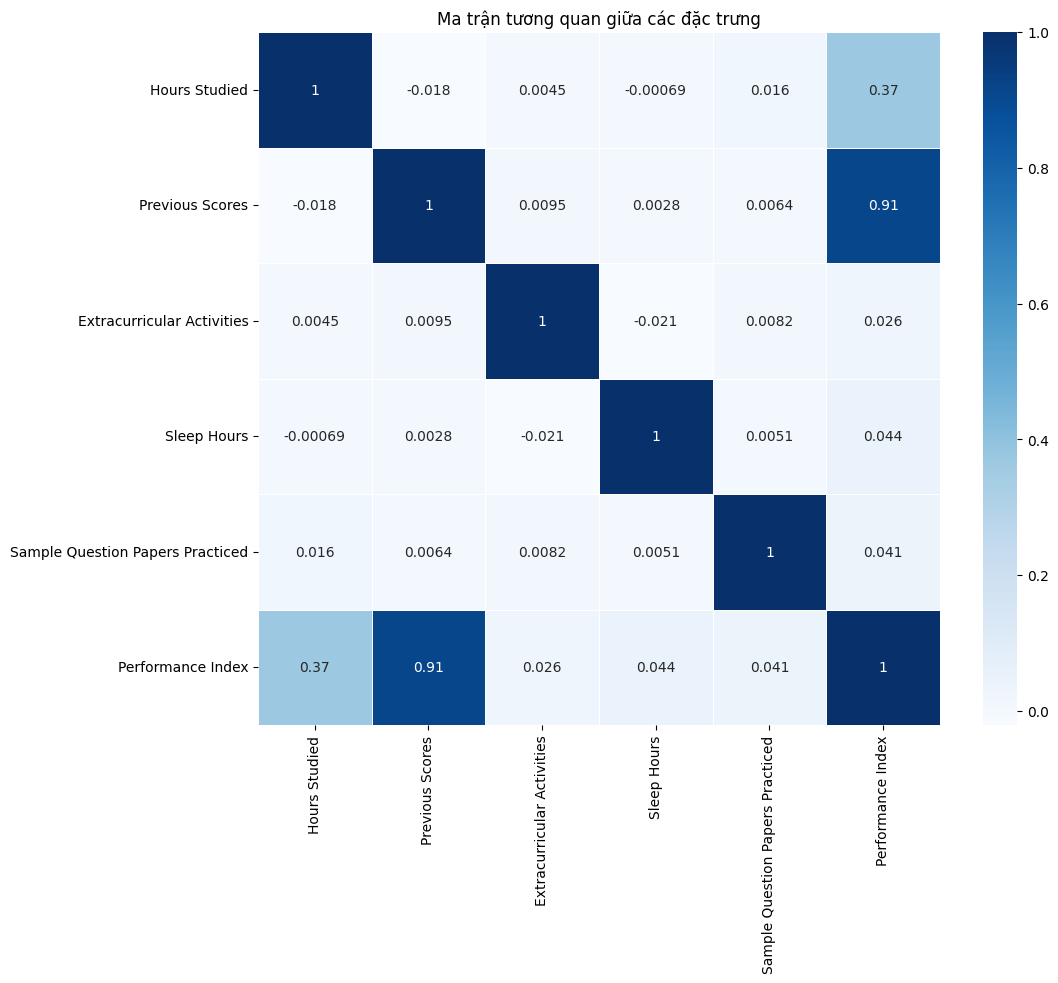

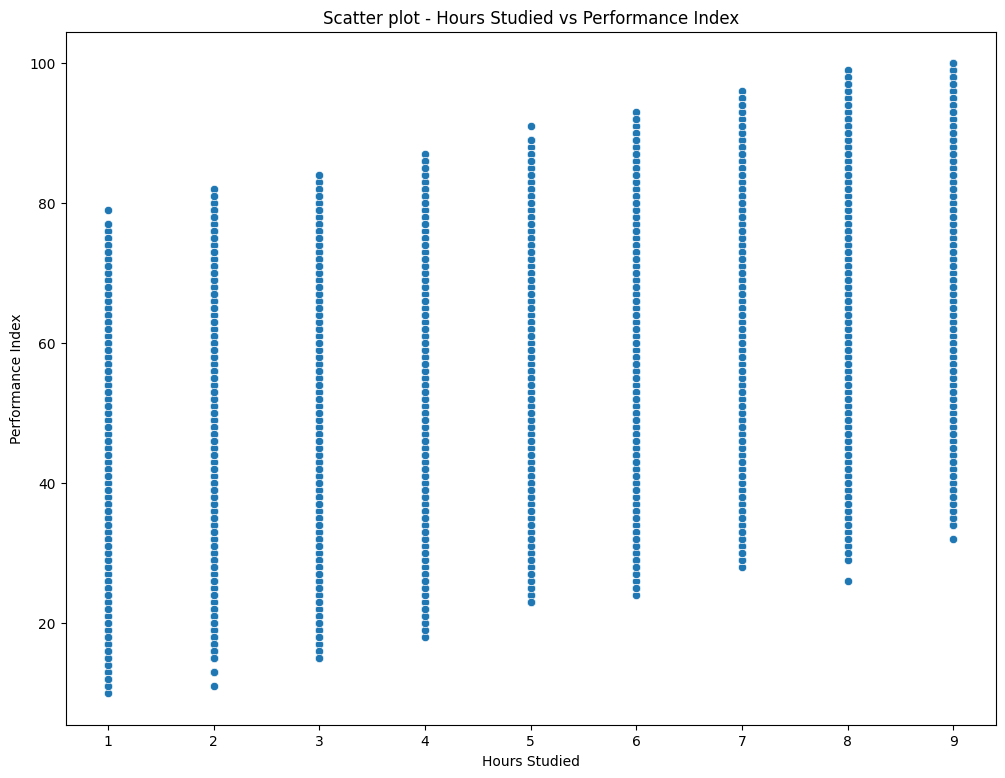

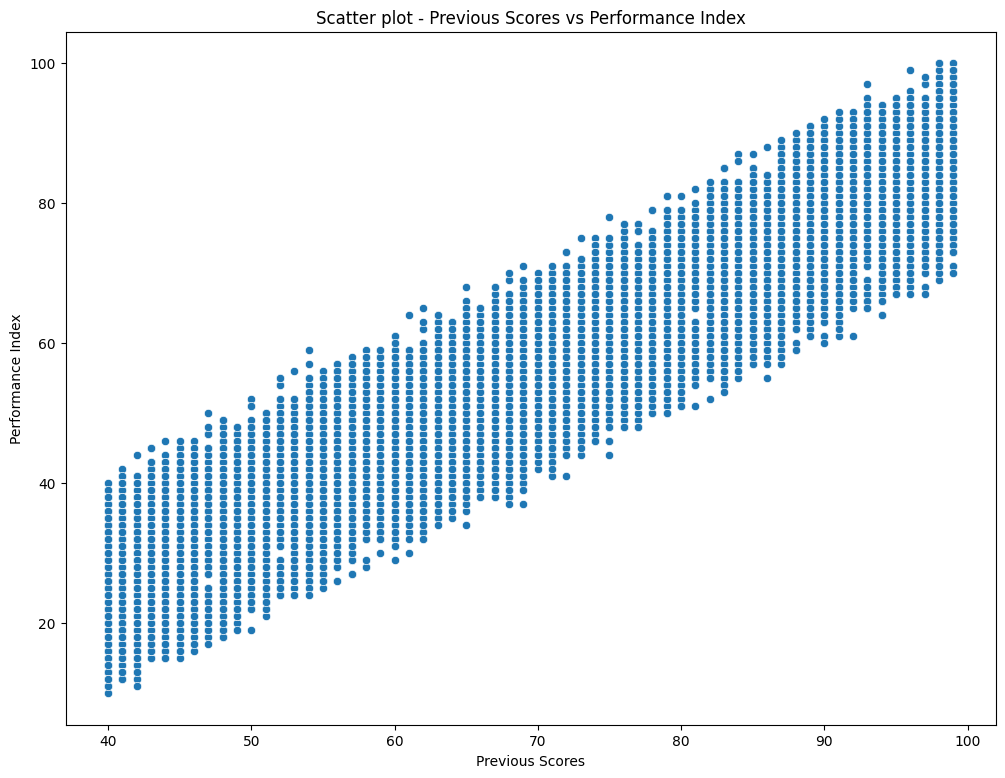

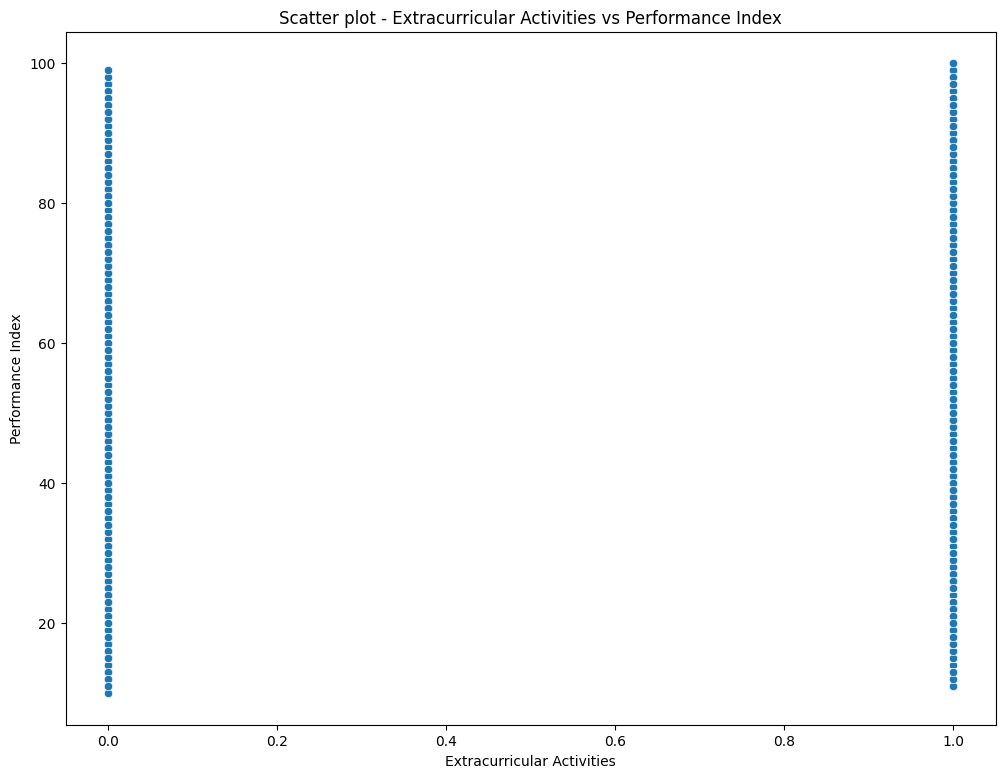

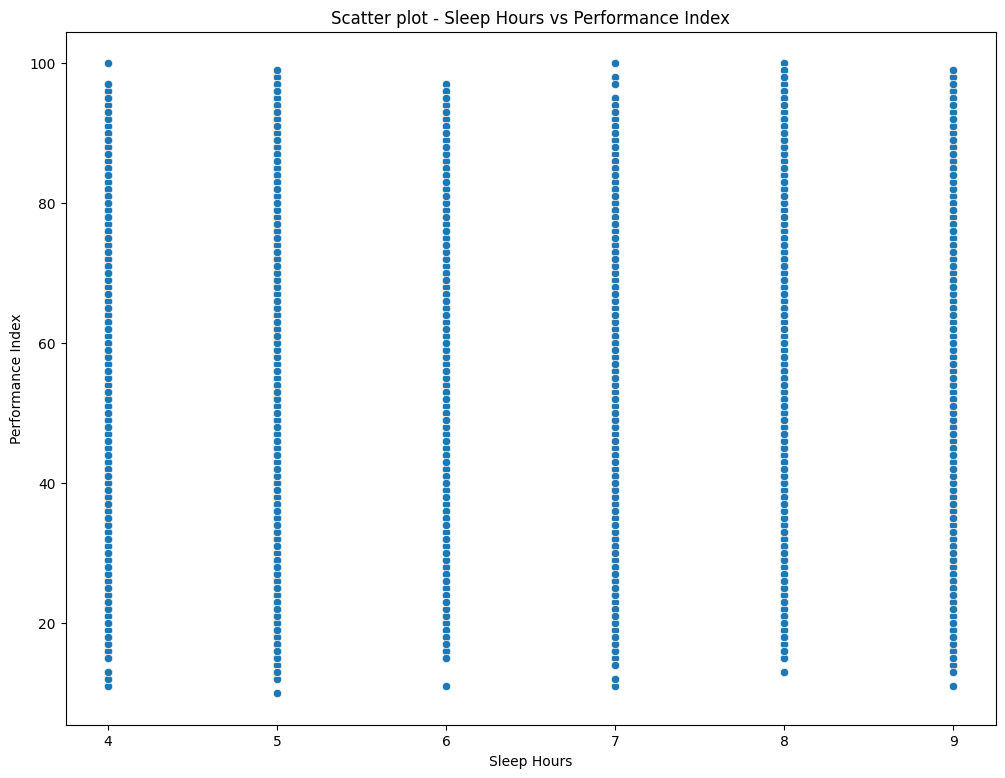

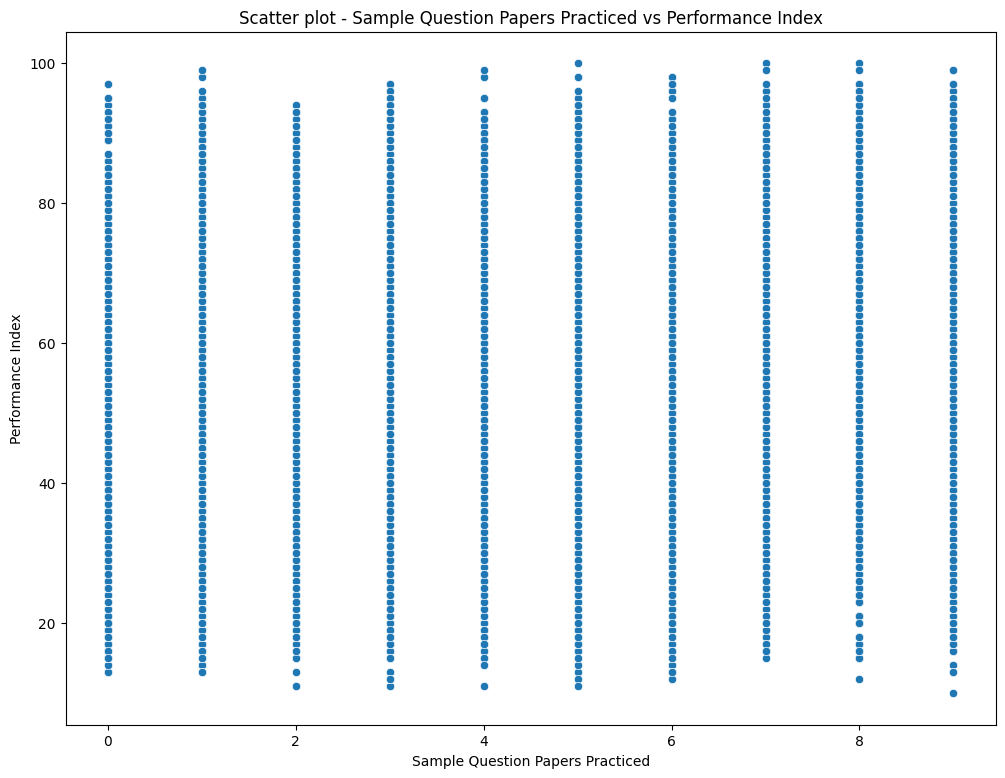

In [17]:
# Phân tích khám phá dữ liệu thông qua thống kê và các biểu đồ
# Chỉ được phân tích trên tập huấn luyện

# Thống kê các đặc trưng của tập huấn luyện
print(train.describe())


# Vẽ biểu đồ
def heat_map(train):
    """
    Vẽ biểu đồ heatmap để hiển thị ma trận tương quan giữa các đặc trưng trong tập dữ liệu.

    Parameters
    ----------
    train : DataFrame
        Tập dữ liệu đầu vào có chứa các đặc trưng cần phân tích.

    Returns
    -------
    None
    """
    plt.figure(figsize=(11, 9))
    sns.heatmap(train.corr(),cmap="Blues", annot=True, linewidths=.5)
    plt.title('Ma trận tương quan giữa các đặc trưng')

def scatter_plot(train):
    """
    Vẽ biểu đồ scatter plot cho từng đặc trưng trong tập dữ liệu so với biến mục tiêu.

    Parameters
    ----------
    train : DataFrame
        Tập dữ liệu đầu vào, trong đó các cột là các đặc trưng và cột cuối cùng là biến mục tiêu.

    Returns
    -------
    None
    """
    for column in train.columns[:-1]:
        plt.figure(figsize=(12, 9))
        sns.scatterplot(x=column, y=train.columns[-1], data=train)
        plt.title(f'Scatter plot - {column} vs {train.columns[-1]}')
        plt.show()

# Gọi hàm vẽ biểu đồ
heat_map(train)
scatter_plot(train)

# Yêu cầu 2a: Xây dựng mô hình sử dụng toàn bộ 5 đặc trưng đề bài cung cấp (2 điểm) 

In [18]:
# Phần code cho yêu cầu 2a
x_train = preprocess(X_train)
result = OLSLinearRegression().fit(x_train, y_train)
result.get_params()

array([-33.96928368,   2.85202007,   1.01786957,   0.60428174,
         0.47356583,   0.19237624])

In [19]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
x_test = preprocess(X_test)
y_hat = result.predict(x_test)
error = mae(y_test, y_hat)
print("MAE: ", error)


MAE:  1.595648688476289


C:\Users\Hoang Bao Khanh\AppData\Local\Temp\ipykernel_20620\4164571885.py:96: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  return np.mean(np.abs(y.ravel() - y_hat.ravel()))


Công thức hồi quy, phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = -33,969 + 2,852.Hours Studied + 1,018.Previous Scores \\+ 0,604.Extracurricular Activities + 0,474.Sleep Hours \\+ 0,192.Sample Question Papers Practiced

# Yêu cầu 2b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng, tìm mô hình cho kết quả tốt nhất (2 điểm)

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [20]:
# Phần code cho yêu cầu 2b
# Tìm ra đặc trưng tốt nhất (trong 5 đặc trưng)
# In ra các kết quả cross-validation như yêu cầu
train_shuffle = train.sample(frac=1)
folds_size = 5
folds_list = k_fold_CrossValidation(train_shuffle, folds_size)
mae_features_list = []

for feature in train.columns[:-1]:
    mae_list = []
    for i in range(folds_size):
        test_x = folds_list[i][feature].values.reshape(-1, 1)
        test_y = folds_list[i].iloc[:, -1].values
        train_x = np.concatenate([folds_list[j][feature].values.reshape(-1, 1) for j in range(folds_size) if i != j])
        train_y = np.concatenate([folds_list[j].iloc[:, -1].values for j in range(folds_size) if i != j])

        train_x = preprocess(train_x)
        lr = OLSLinearRegression().fit(train_x, train_y)
        test_x = preprocess(test_x)
        y_pred = lr.predict(test_x)
        mae_value = mae(y_pred, test_y)
        mae_list.append(mae_value)

    mae_features_list.append((feature, np.mean(mae_list)))

prediction = pd.DataFrame(mae_features_list, columns=['Feature', 'MAE'])
prediction

,Feature,MAE
0,Hours Studied,15.450183
1,Previous Scores,6.618422
2,Extracurricular Activities,16.195195
3,Sleep Hours,16.187882
4,Sample Question Papers Practiced,16.184346


In [21]:
# Huấn luyện lại mô hình best_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
best_model = min(mae_features_list, key=lambda x: x[1])
best_X_train = X_train[best_model[0]].values.reshape(-1, 1)
best_X_train = preprocess(best_X_train)
best_feature_model = OLSLinearRegression().fit(best_X_train, y_train)
print("Params: ",best_feature_model.get_params())

Params:  [-14.98864578   1.01050301]


In [22]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_feature_model
best_X_test = test[best_model[0]].values.reshape(-1, 1)
best_X_test = preprocess(best_X_test)
y_hat = best_feature_model.predict(best_X_test)
error = mae(y_test, y_hat)
print("MAE: ", error)

MAE:  6.5442772934525015


C:\Users\Hoang Bao Khanh\AppData\Local\Temp\ipykernel_20620\4164571885.py:96: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  return np.mean(np.abs(y.ravel() - y_hat.ravel()))


Công thức hồi quy (dựa trên mô hình đặc trưng tốt nhất), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = -14,989 + 1,011.Previous Scores

# Yêu cầu 2c: Sinh viên tự xây dựng/thiết kế mô hình, tìm mô hình cho kết quả tốt nhất (2 điểm)

## Xây dựng/Thiết kế mô hình

In [23]:
# Trình bày toàn bộ code liên quan đến việc thiết kế mô hình

def implement_model(train, index):
    """
    Tạo mô hình dựa trên các đặc trưng đã biến đổi từ dữ liệu đầu vào.

    Parameters
    ----------
    train : pd.DataFrame
        Tập dữ liệu huấn luyện bao gồm các đặc trưng và biến mục tiêu.
    index : int
        Chỉ số xác định mô hình cần áp dụng:
        - 1: Mô hình sử dụng bình phương các đặc trưng đầu vào.
        - 2: Mô hình sử dụng hai đặc trưng Hours Studied và Previous Scores.
        - 3: Mô hình sử dụng tổ hợp các đặc trưng bằng cách cộng và nhân hai đặc trưng Hours Studied và Previous.

    Returns
    -------
    pd.DataFrame
        Tập dữ liệu đã được biến đổi theo mô hình được chọn.
    """
    # Mô hình 1: Là kết hợp bình phương các đặc trưng (ngoài trừ )
    if index == 1:
        return pd.concat((train['Hours Studied']**2, train['Previous Scores']**2, train['Extracurricular Activities']**2, train['Sleep Hours']**2, train['Sample Question Papers Practiced']**2, train['Performance Index']), axis=1)
    
    # Mô hình 2: mô hình huấn luyện 2 đặc trưng Hours Studied và Previous Scores
    elif index == 2:
        return pd.concat((train['Hours Studied'], train['Previous Scores'], train['Performance Index']), axis=1)
    
    # Mô hình 3: Tạo ra 2 đặc trưng mới bằng cách lấy tổng và tích 2 đặc trưng Hours Studied và Previous
    elif index == 3:
        return pd.concat((train['Previous Scores'] + train['Hours Studied'], train['Hours Studied'] * train['Previous Scores'], train['Performance Index']), axis=1)

## Tìm mô hình cho kết quả tốt nhất

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

In [24]:
# Phần code cho yêu cầu 2c
# Tìm ra mô hình tốt nhất (trong m mô hình mà sinh viên tự thiết kế)
# In ra các kết quả cross-validation như yêu cầu
models = 3
folds = 5
model_list = []
train_shuffle = train.sample(frac=1)
for model in range(models):
    folds_list = []

    data = implement_model(train_shuffle, model + 1)

    folds_list = k_fold_CrossValidation(data, folds)

    mae_list = []
    for i in range(folds):
        test_x = folds_list[i].iloc[:, :-1].values
        test_y = folds_list[i].iloc[:, -1].values
        train_x = np.concatenate([folds_list[j].iloc[:, :-1].values for j in range(folds_size) if i != j])
        train_y = np.concatenate([folds_list[j].iloc[:, -1].values for j in range(folds_size) if i != j])
        train_x = preprocess(train_x)
        lr = OLSLinearRegression().fit(train_x, train_y)
        test_x = preprocess(test_x)
        y_pred = lr.predict(test_x)
        mae_value = mae(y_pred, test_y)
        mae_list.append(mae_value)

    model_list.append((model + 1, np.mean(mae_list)))

df = pd.DataFrame(model_list, columns=['Model', 'MAE'])
df

,Model,MAE
0,1,2.647946
1,2,1.817043
2,3,2.067020


In [25]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện
my_best_model = min(model_list, key=lambda x: x[1])
best_X_train = implement_model(train, my_best_model[0]).iloc[:, :-1]
best_X_train = preprocess(best_X_train)
best_feature_model = OLSLinearRegression().fit(best_X_train, y_train)
print("Params: ", best_feature_model.get_params())

Params:  [-29.7467318    2.85576037   1.01837886]


In [26]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model
best_X_test = implement_model(test, my_best_model[0]).iloc[:,  :-1]
best_X_test = preprocess(best_X_test)
y_hat = best_feature_model.predict(best_X_test)
error = mae(y_test, y_hat)
print("MAE: ", error)

MAE:  1.8394363976529697


C:\Users\Hoang Bao Khanh\AppData\Local\Temp\ipykernel_20620\4164571885.py:96: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  return np.mean(np.abs(y.ravel() - y_hat.ravel()))


Công thức hồi quy (dựa trên mô hình tốt nhất mà sinh viên tự xây dựng/thiết kế), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = -29,747 + 2,856.Hours Studied + 1,018.Previous Scores